In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv(r'C:\Users\siddh\Desktop\1\ML_Task\winequality-red.csv', header=0)
data = (data - data.mean())/data.std()
x = data.iloc[:,0:11]
y=data["quality"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=69)

In [6]:
def CalcCost(x,y,w,b):
    return np.sum(np.power((x.dot(w)-y),2))/(2*len(x))
def GradDescent(x,y,w,b,alpha,iters):
    costlist=[0]*iters
    for iter in range(iters):
        WeightGrad = x.T.dot(x.dot(w)+b-y)/len(x)
        BiasGrad =np.sum(x.dot(w)+b-y)/len(x)
        w=w-alpha*WeightGrad
        b=b-alpha*BiasGrad
        cost=CalcCost(x,y,w,b)
        costlist[iter]=cost
    return w,b,costlist
w,b,c=GradDescent(xtrain,ytrain,np.zeros(xtrain.shape[1]),0,0.1,iters=500)

In [7]:
def predict(x,w,b):
    return x.dot(w)+b
ypred=predict(xtest,w,b)
def r2score(ypred, y):
    rss = np.sum((ypred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    print("Accuracy is:",r2)
r2score(ypred, ytest)

Accuracy is: 0.36943259813201523


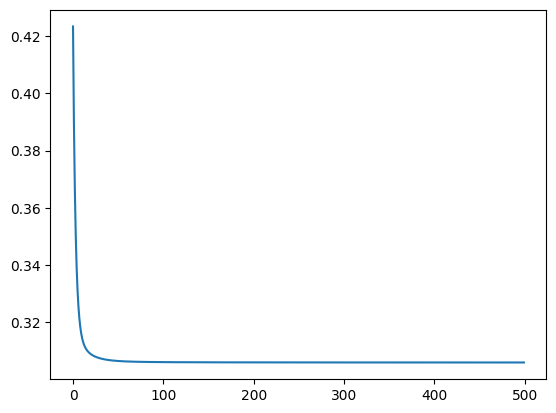

In [8]:
plt.plot(c)